In [1]:
from math import cos, sin, exp

# fx, fy - дифф, fx2, fy2 - оригинальные уравнения

def fx(t, xvn, yvn, a):
    return a*(cos(t) ** 2 * sin(t) + 2*cos(t) - (2 + xvn * yvn)*xvn) - yvn

def fy(t, xvn, yvn, a):
    return xvn + yvn - sin(t)

def fx2(t):
    return cos(t)

def fy2(t):
    return sin(t)

In [2]:
# неявный 1
def jac1(T, xvn, yvn, t, table, k, a):
  def jac_f(x):
    return [[-a * (x[0] * x[1] + 2) * T - 1, (-a * x[0] * x[0] - 1) * T],
            [T * 1, T * 1 - 1]]
  return jac_f

In [3]:
def jac2(T, xvn, yvn, t, table, k, ak):
    def jac_f(x):
      xn = [xvn + table.a[1][0] * k[0] + table.a[1][1] * x[0], xvn + table.a[1][0] * k[0] + table.a[1][1] * x[0]]
      yn = [yvn + table.a[1][0] * k[1] + table.a[1][1] * x[1], yvn + table.a[1][0] * k[1] + table.a[1][1] * x[1]]
      return [[-ak * (2 * xn[0] * yn[0] * table.a[1][1] + 2 * table.a[1][1]) * T - 1,
               (-ak * xn[0] * xn[0] - 1 * table.a[1][1]) * T],
              [T * 1 * table.a[1][1],
               T * 1 * table.a[1][1] - 1]]
    return jac_f

/home/eva012/projectPractice/src/test_methods.py:47: RuntimeWarning: divide by zero encountered in scalar divide
  px1.plot(TL, max_error_curr, label=methods[i].__name__ + f" {mean([(max_error_curr[i]/TL[i]) for i in range(len(TL))])}")
/home/eva012/projectPractice/src/test_methods.py:55: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


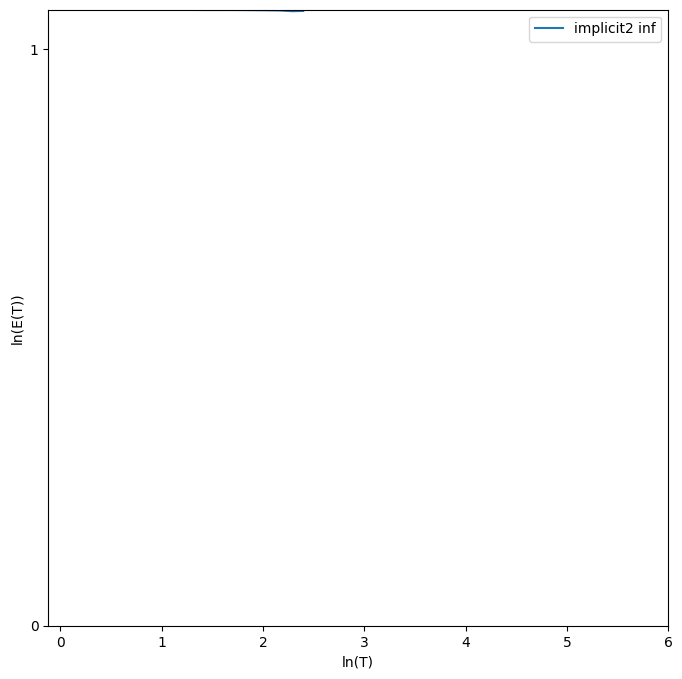

In [4]:
from num_methods import Solver2
from test_methods import Test2

t_start = 0
t_finish = 4
a = 10
sol = Solver2((fx, fy), [jac1, jac2], [a], (fx2(0), fy2(0)), (t_start, t_finish))
tester = Test2((fx2, fy2))
tester.test_methods((0.009, 0.1), 0.01, sol, [sol.explicit1])

# fig = plt.figure(figsize=(8,8))
# px1 = fig.add_subplot(111)
# px1.plot(t_l, diff_l1, label="явный1" + f" {mean(diff_l1[i]/t_l[i] for i in range(1, len(t_l)))}")
# px1.set_xticks(np.arange(0, math.ceil(math.log(T) - crd_move_x) + 1, step=1))
# px1.set_yticks(np.arange(0, math.ceil(math.log(T) - crd_move_y1) + 1, step=1))
# px1.set_xlabel("ln(T)")
# px1.set_ylabel("ln(E(T))")
# px1.legend()
# fig.show()

    